In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('../Healthcare investmens /'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Healthcare investmens /Untitled.ipynb
../Healthcare investmens /Healthcare_Investments_and_Hospital_Stay (1).csv
../Healthcare investmens /.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [3]:
df = pd.read_csv('Healthcare_Investments_and_Hospital_Stay (1).csv')
print(df.shape)
df.head()

(518, 6)


Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0      AUS  1992            6.6       1.43        16.71           1.43
1      AUS  1994            6.4       2.36        18.48           2.36
2      AUS  1995            6.5       2.89        20.55           2.89
3      AUS  1996            6.4       2.96        21.95           2.96
4      AUS  1997            6.2       3.53        23.34           3.53

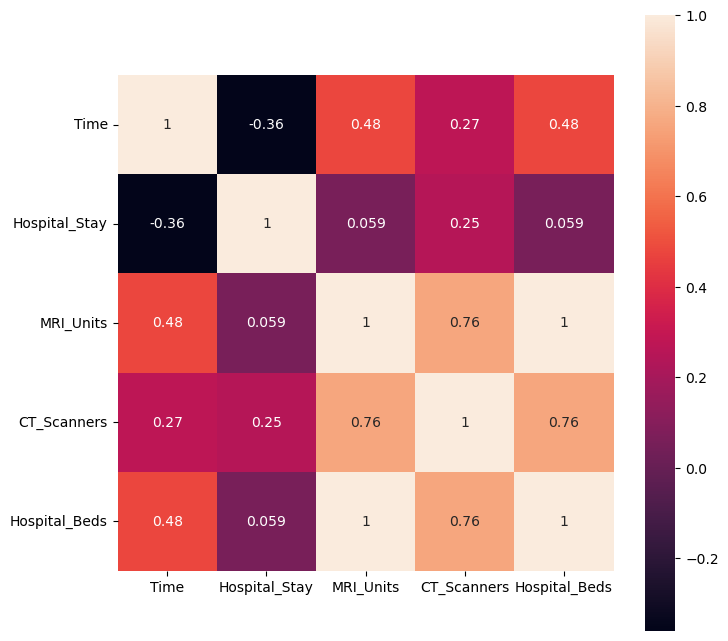

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

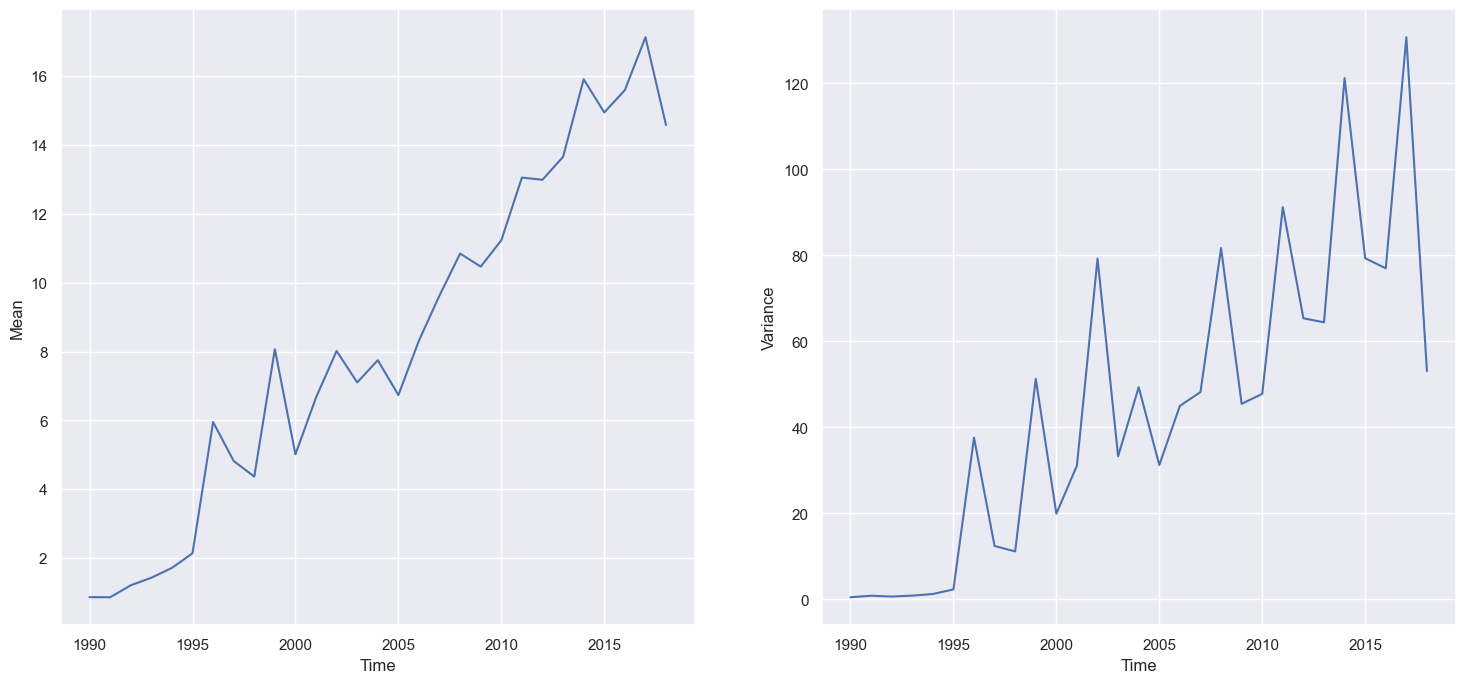

In [6]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['MRI_Units'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['MRI_Units'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

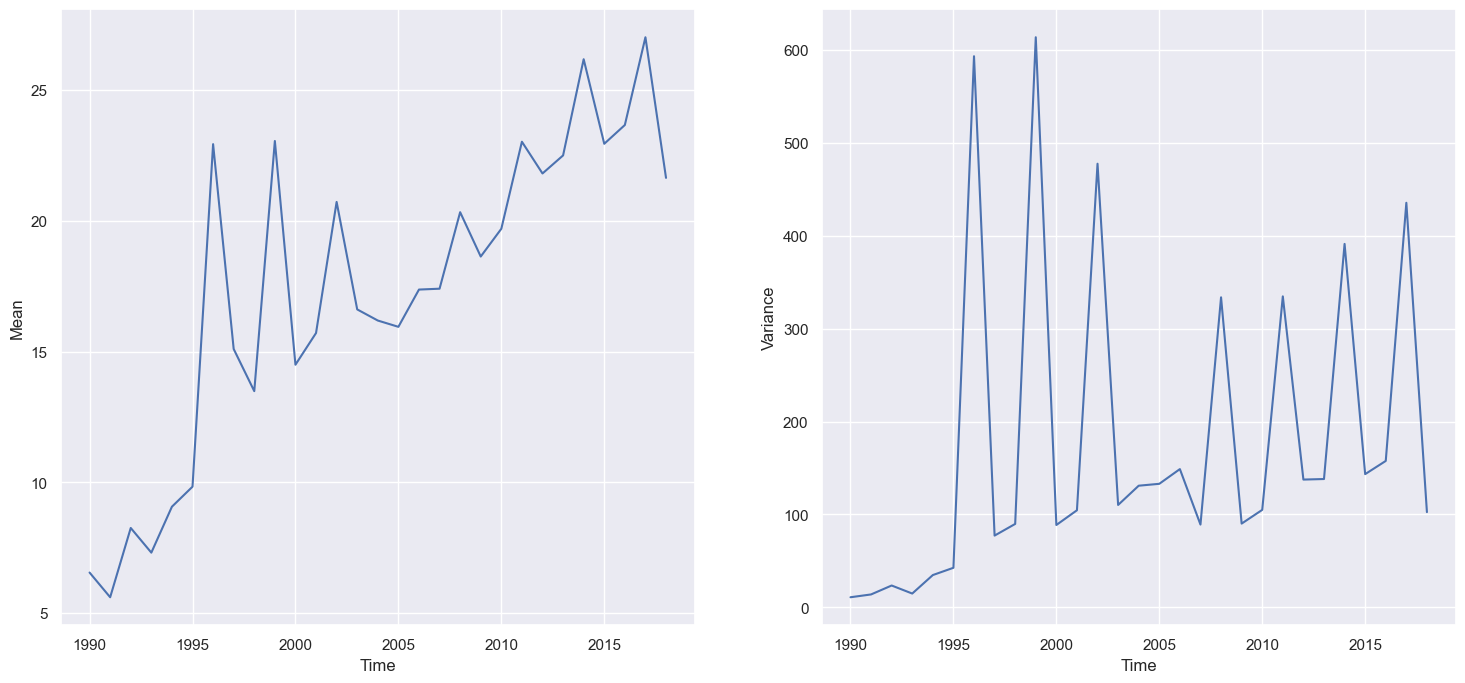

In [7]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['CT_Scanners'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['CT_Scanners'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

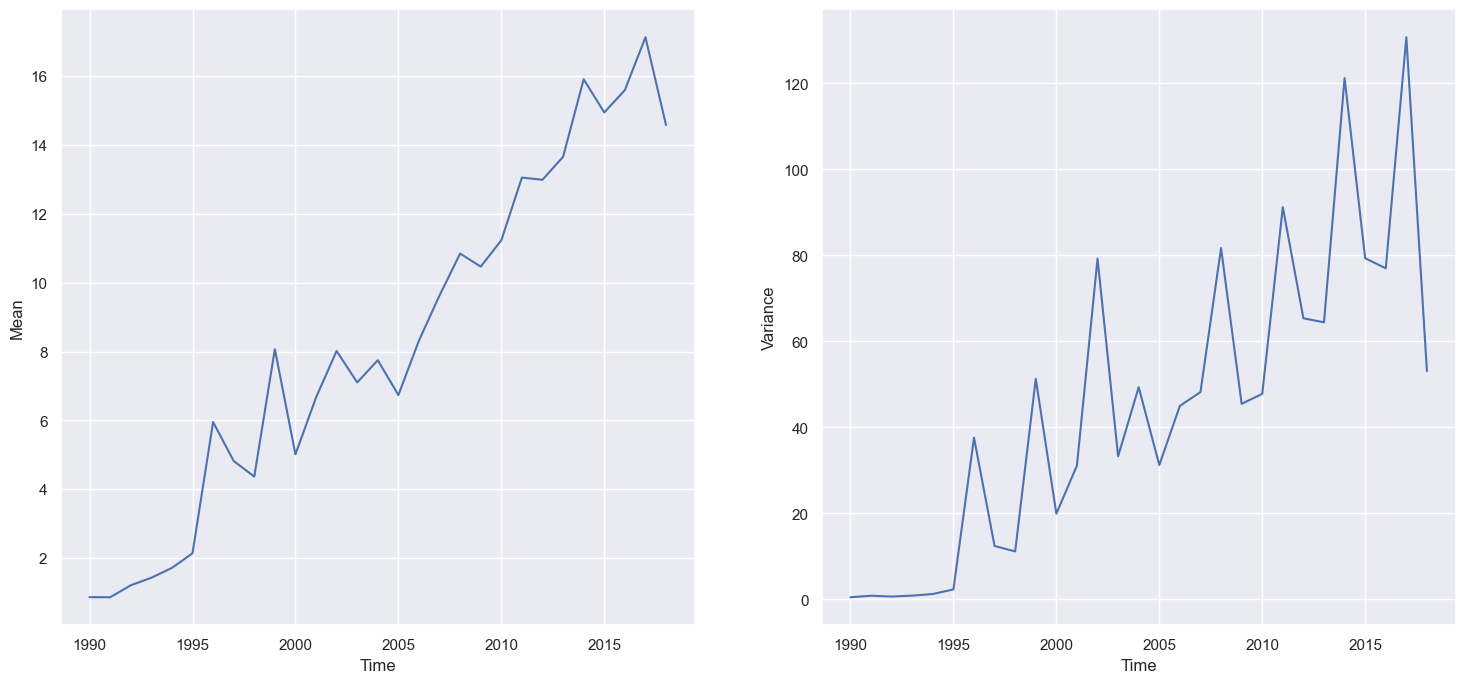

In [8]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['Hospital_Beds'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['Hospital_Beds'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

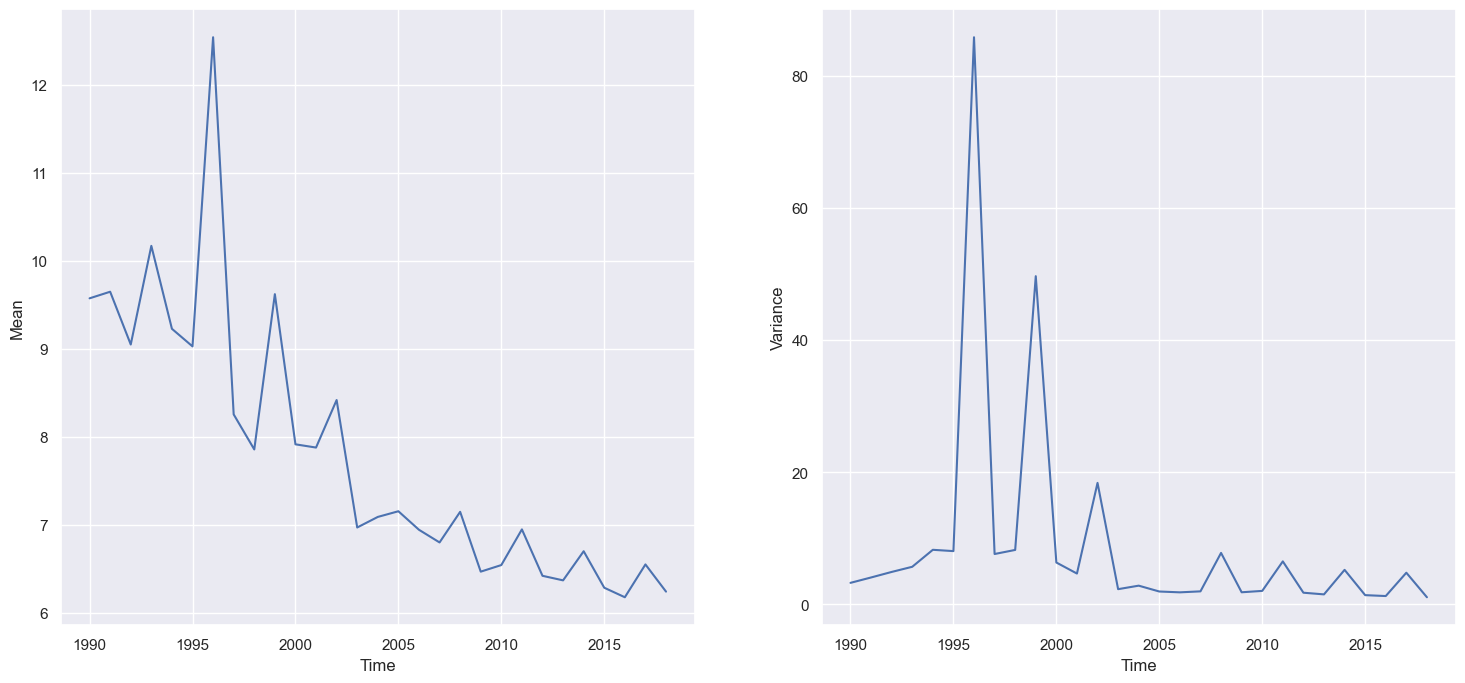

In [9]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['Hospital_Stay'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['Hospital_Stay'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

model= ols('Time ~ Hospital_Beds + CT_Scanners + MRI_Units + Hospital_Stay', data=df).fit()
durbin_watson(model.resid)

0.3217399445721381

In [12]:
df1 = df[['MRI_Units', 'CT_Scanners', 'Hospital_Beds']]

<AxesSubplot:>

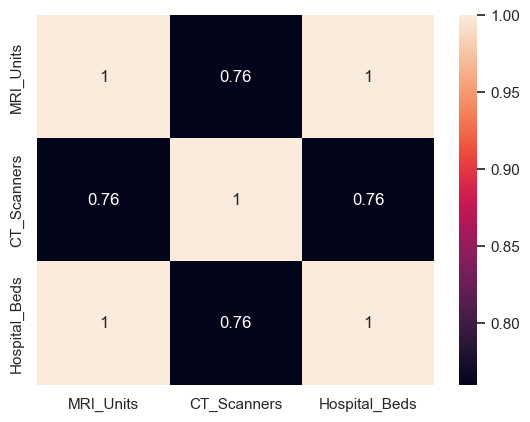

In [13]:
sns.heatmap(df1.corr(), annot=True)

In [14]:
X= df1.iloc[:, :-1].values
y= df1.iloc[:, -1].values

In [15]:
X

array([[ 1.43, 16.71],
       [ 2.36, 18.48],
       [ 2.89, 20.55],
       ...,
       [12.2 , 23.01],
       [12.37, 23.33],
       [12.49, 24.27]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([ 5.48,  2.38,  3.14,  8.98, 13.38,  5.67,  9.22, 10.85,  5.5 ,
        8.34,  7.16, 28.73, 14.77,  1.13, 11.24,  8.87,  6.78, 12.58,
       21.61,  1.78, 18.65,  5.01,  7.04,  2.94, 12.51,  2.79, 23.53,
       13.68,  2.02, 14.3 ,  6.84, 14.04, 14.06, 16.51, 12.64,  8.56,
        2.12,  2.4 , 25.2 ,  9.83,  4.84, 24.62, 13.31,  9.22, 10.57,
       22.86, 27.38,  0.29, 37.65, 15.34, 21.16, 21.38, 12.29,  5.62,
        2.27,  2.36,  7.91,  4.26, 13.04, 42.96, 21.94, 10.4 , 21.91,
        4.54, 19.89, 24.17,  2.76, 23.37,  8.26, 21.62,  2.57, 46.86,
        3.7 ,  1.54,  0.87,  5.  ,  9.79,  1.05, 15.85,  9.56,  7.41,
        8.34,  0.88, 23.6 , 18.48,  3.99, 12.2 ,  2.57,  5.8 ,  6.43,
       14.77, 12.88, 20.06, 27.81, 10.42,  1.36,  4.47, 34.49, 10.69,
       21.59,  8.85,  7.11, 10.35, 14.32, 13.18, 13.62, 10.84,  2.26,
       11.6 , 36.74, 16.96, 11.9 ,  4.92, 19.86,  6.01,  0.92,  0.74,
       19.26, 11.26, 34.71,  1.51,  3.52, 12.22,  2.7 ,  3.79,  4.48,
        4.6 , 15.96,

In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

1.0


Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0      AUS  1992            6.6       1.43        16.71           1.43
1      AUS  1994            6.4       2.36        18.48           2.36
2      AUS  1995            6.5       2.89        20.55           2.89
3      AUS  1996            6.4       2.96        21.95           2.96
4      AUS  1997            6.2       3.53        23.34           3.53

In [21]:
locations = set(df['Location'])
print(f"There are {len(locations)} countries data. \n")

print("The country breakdown is as follows:")
print(locations)

There are 32 countries data. 

The country breakdown is as follows:
{'FRA', 'LVA', 'USA', 'NLD', 'ESP', 'LUX', 'AUS', 'HUN', 'AUT', 'ISL', 'ISR', 'NZL', 'CZE', 'TUR', 'JPN', 'IRL', 'GBR', 'DNK', 'LTU', 'POL', 'RUS', 'DEU', 'SVK', 'CAN', 'KOR', 'EST', 'ITA', 'FIN', 'SVN', 'BEL', 'GRC', 'PRT'}


Text(0.5, 1.0, 'records for each location')

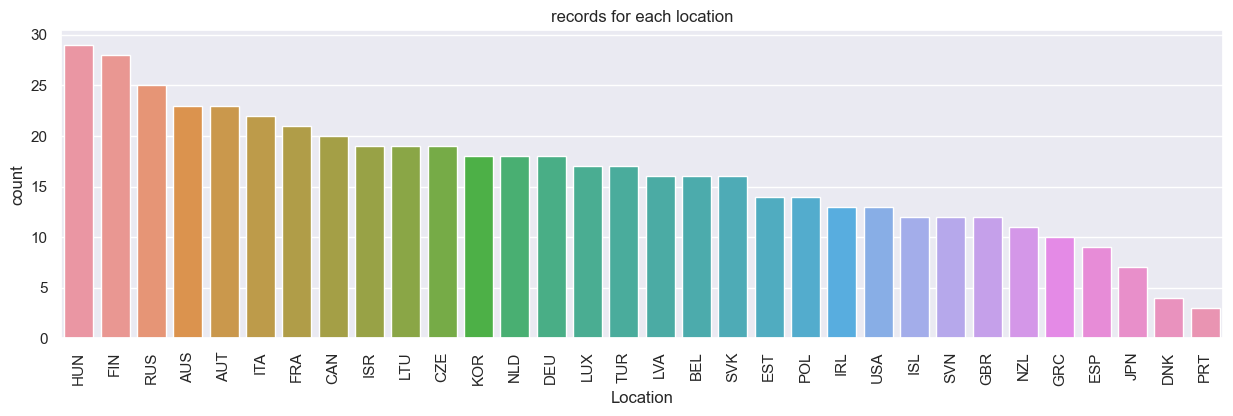

In [22]:
fig = plt.figure(figsize=(15,4))
g = sns.countplot(data=df, x='Location', 
                 order=df['Location'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('records for each location')

In [24]:
print(f'Minimum year: {min(df["Time"])}')
print(f'Maximum year: {max(df["Time"])}')

Minimum year: 1990
Maximum year: 2018


/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time distribution')

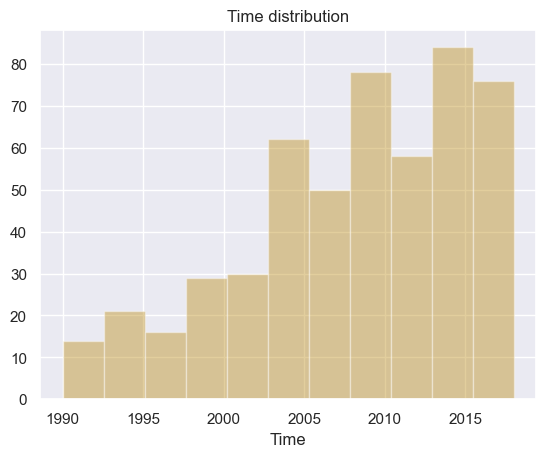

In [26]:
g = sns.distplot(df['Time'], kde=False, rug=False, color='darkgoldenrod')
g.set_title('Time distribution')

Text(0.5, 1.0, 'Hospital Stay distribution')

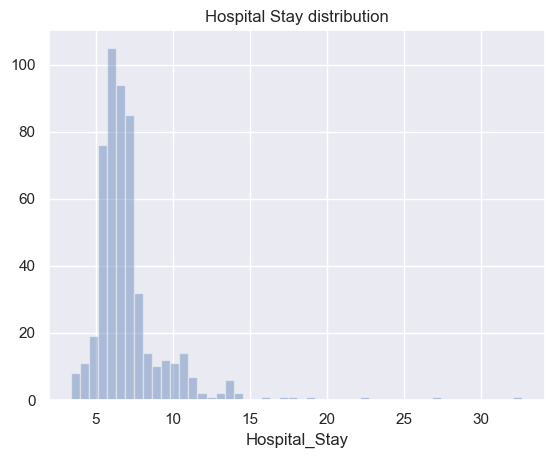

In [27]:
g = sns.distplot(df['Hospital_Stay'], kde=False, rug=False, color='b')
g.set_title('Hospital Stay distribution')

Text(0.5, 1.0, 'MRI_Units distribution')

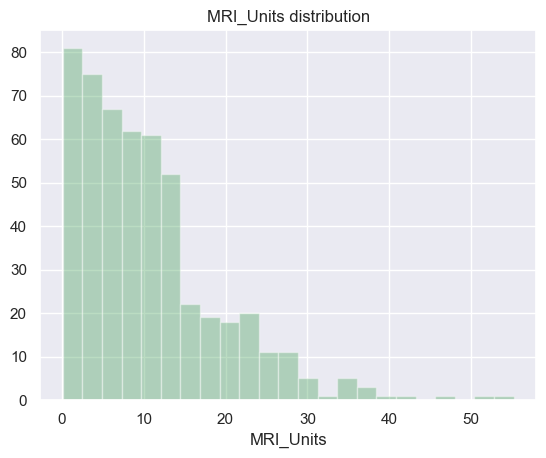

In [29]:
g = sns.distplot(df['MRI_Units'], kde=False, rug=False, color='g')
g.set_title('MRI_Units distribution')

Text(0.5, 1.0, 'CT_Scanners distribution')

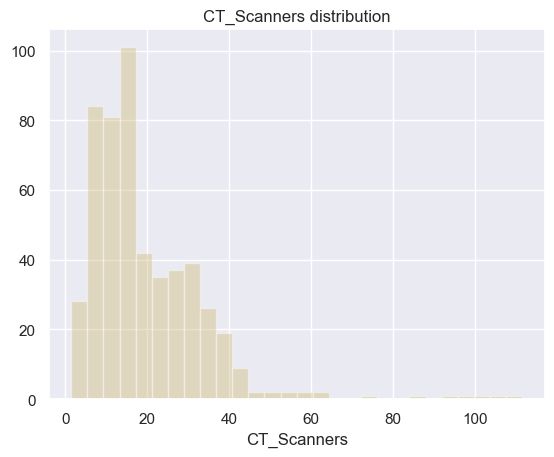

In [31]:
g = sns.distplot(df['CT_Scanners'], kde=False, rug=False, color='y')
g.set_title('CT_Scanners distribution')

Text(0.5, 1.0, 'Hospital_Beds distribution')

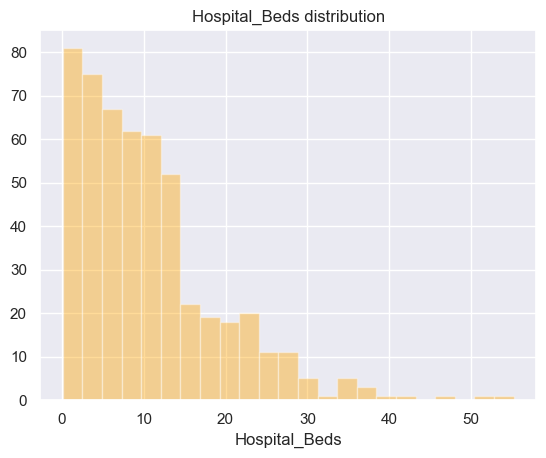

In [33]:
g = sns.distplot(df['Hospital_Beds'], kde=False, rug=False, color='orange')
g.set_title('Hospital_Beds distribution')

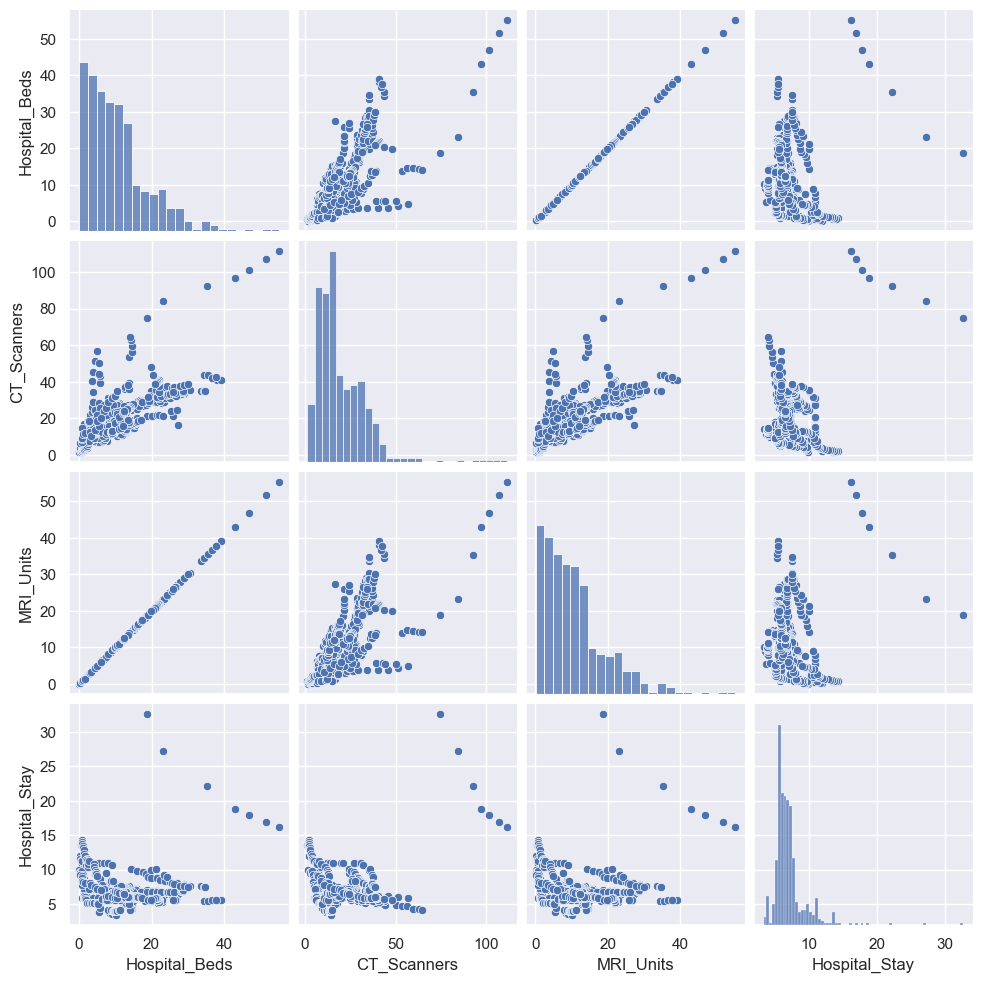

In [34]:
g = sns.pairplot(df[['Hospital_Beds', 'CT_Scanners', 'MRI_Units',  'Hospital_Stay']])

In [38]:
import plotly.express as px

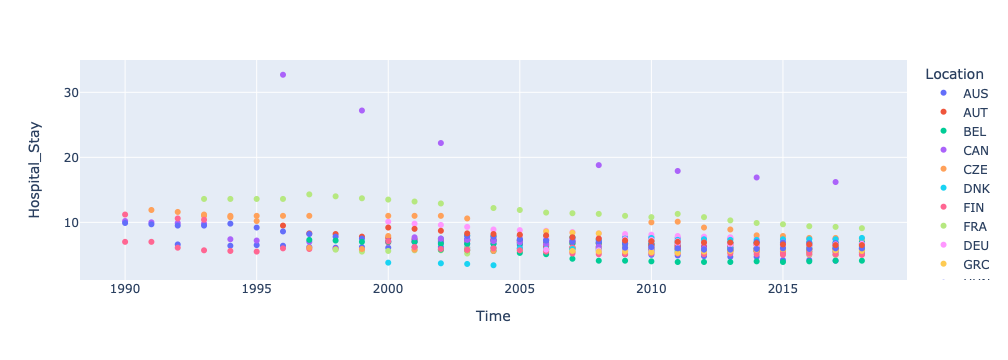

In [39]:
fig = px.scatter(df, x='Time', y='Hospital_Stay', color='Location', hover_data=['Time', 'Location'])
fig.show()

/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



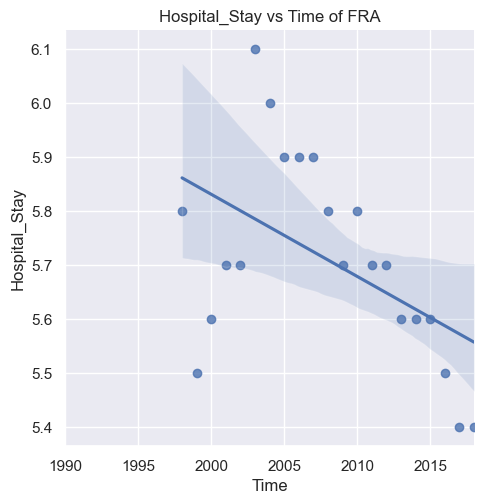

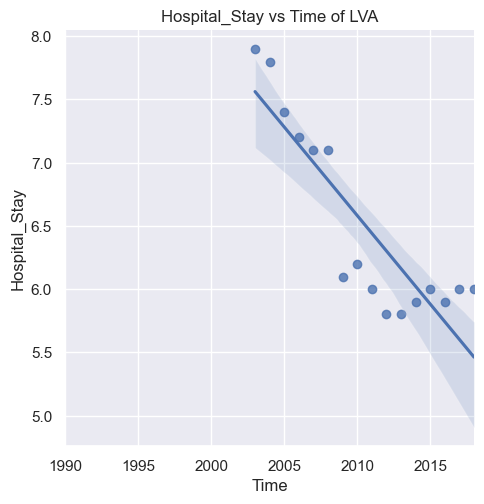

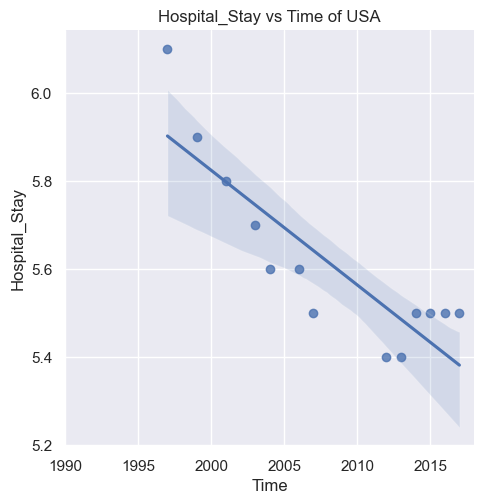

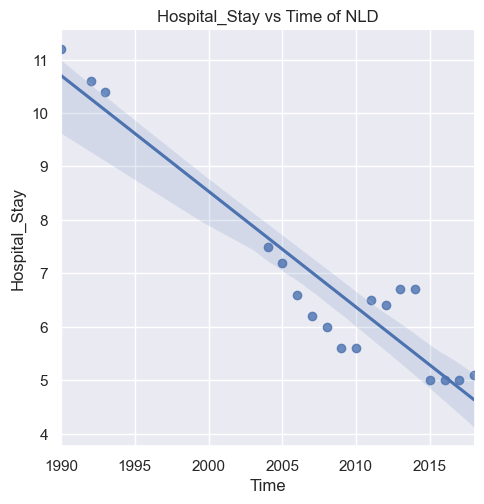

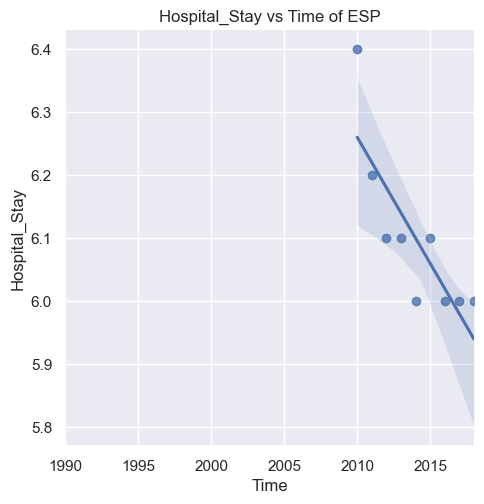

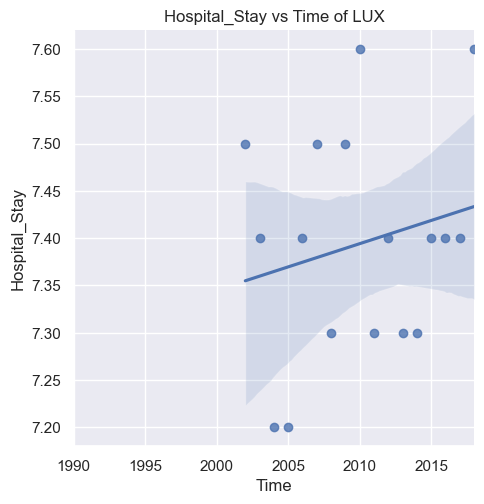

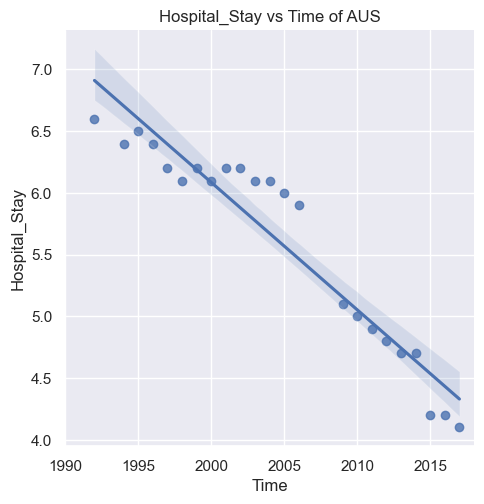

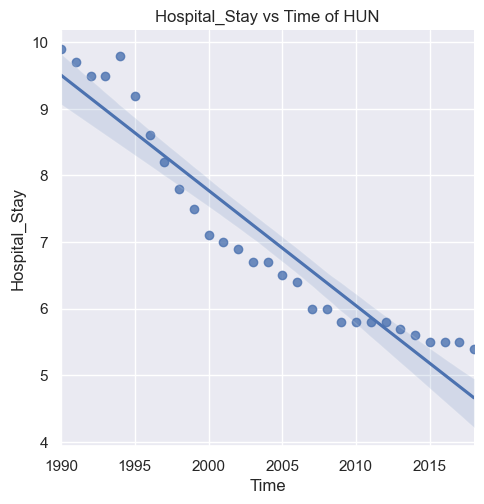

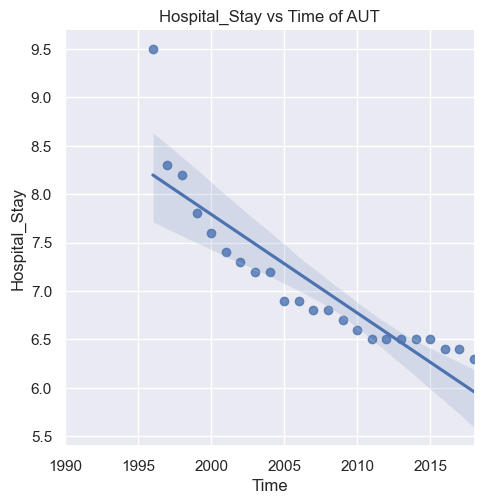

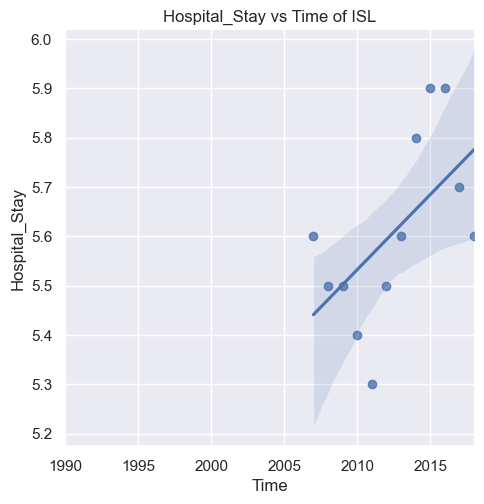

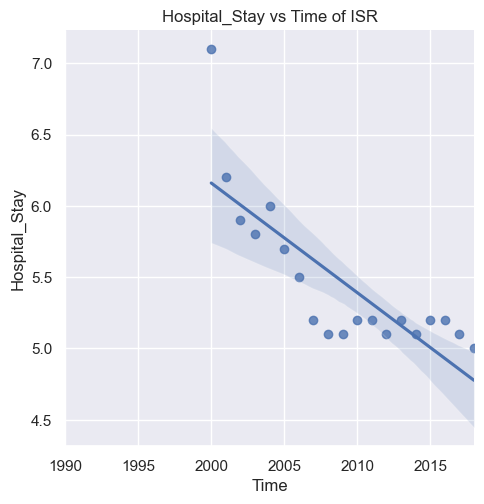

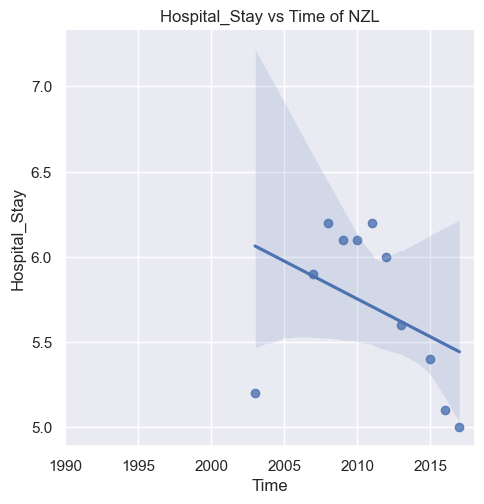

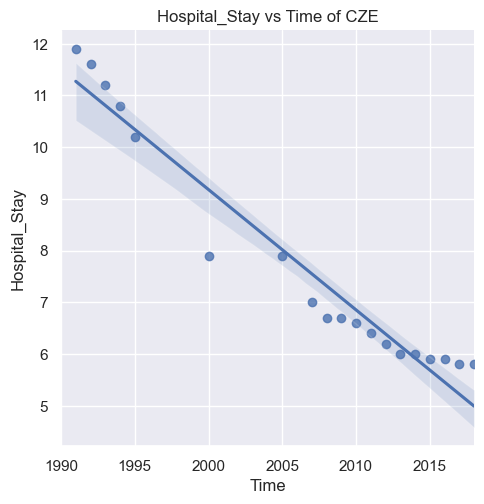

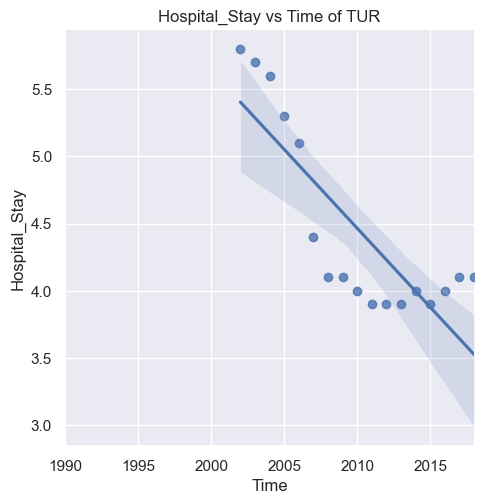

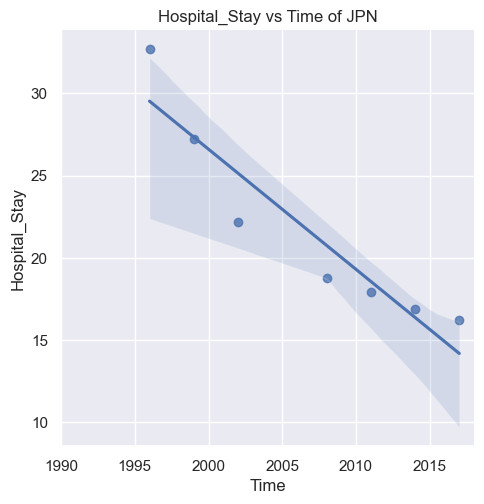

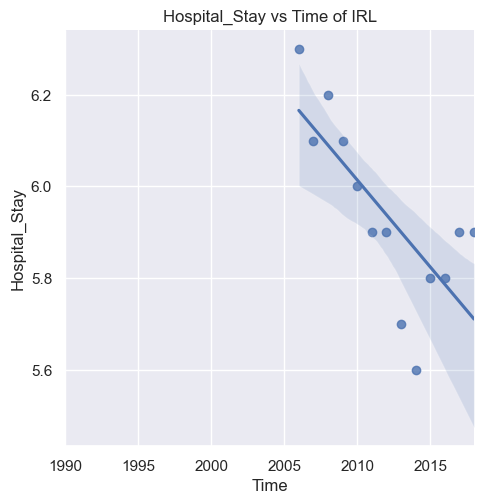

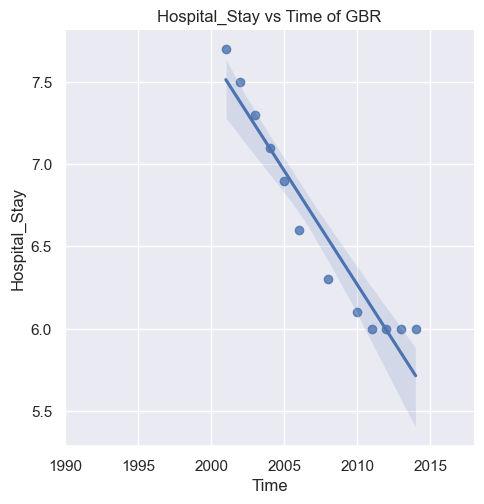

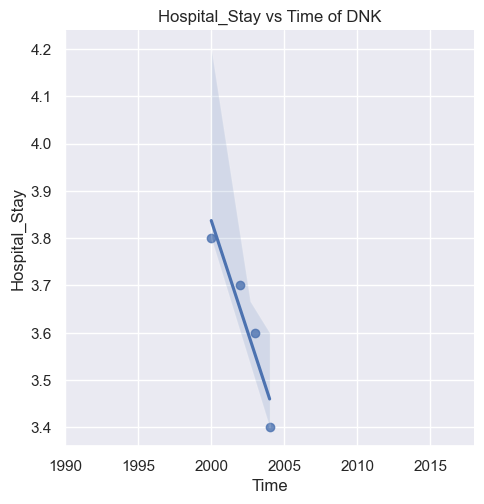

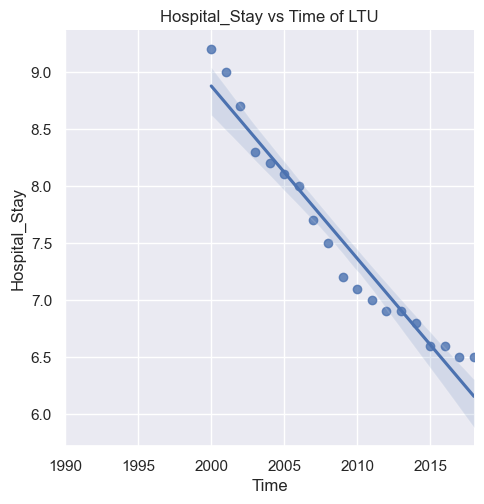

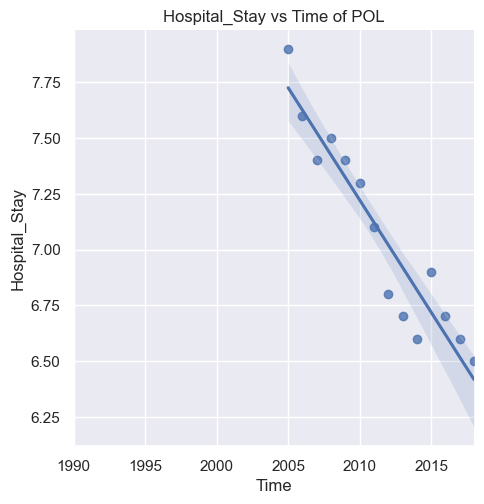

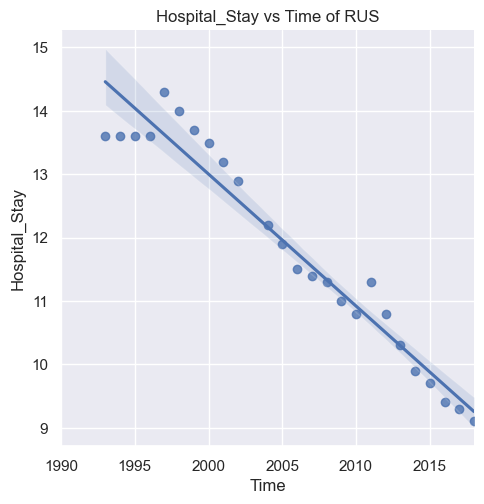

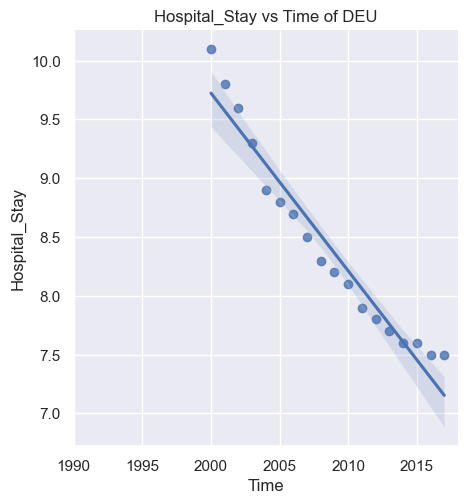

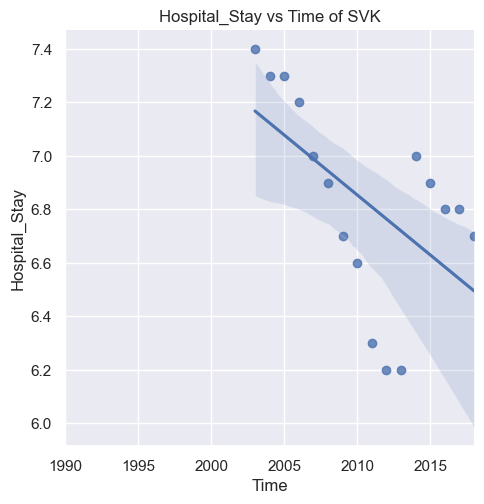

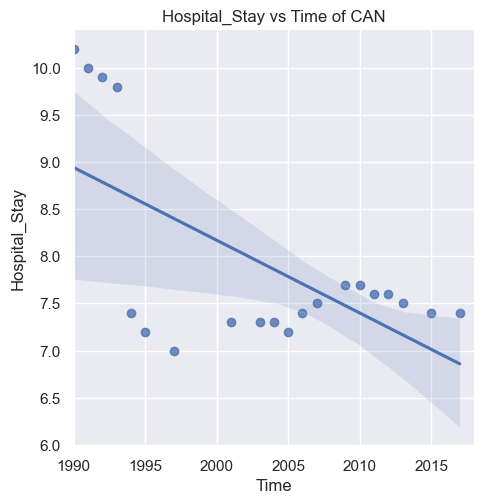

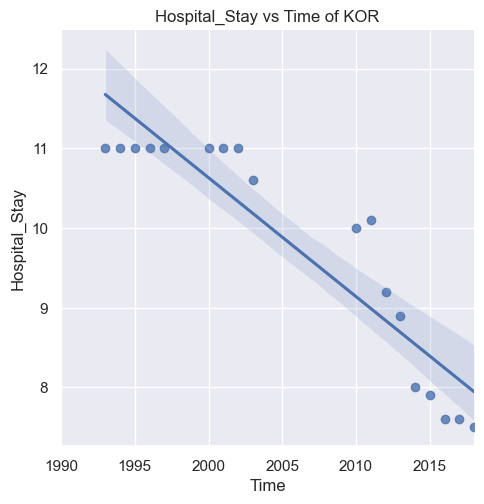

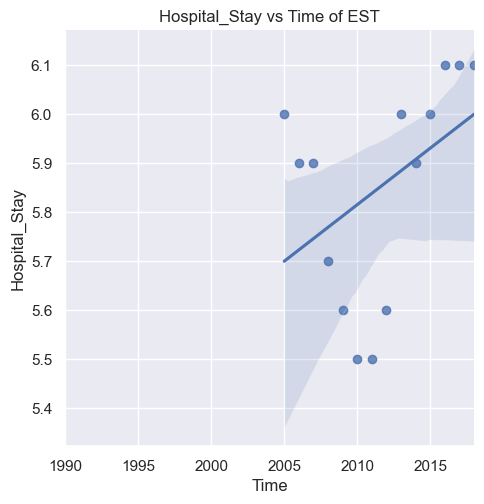

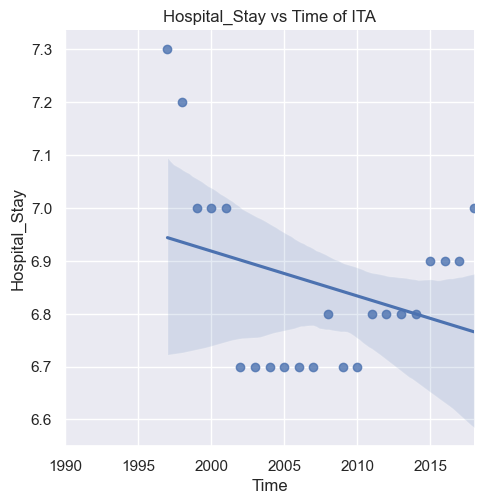

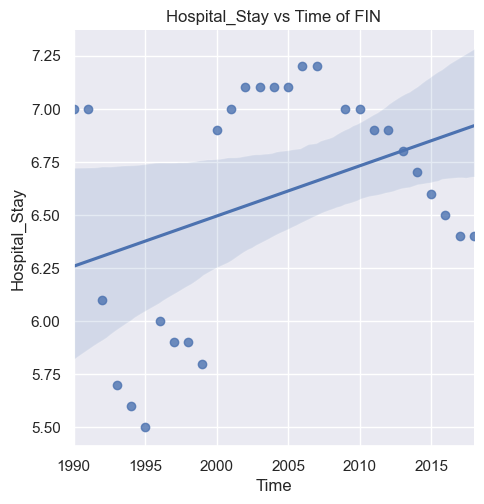

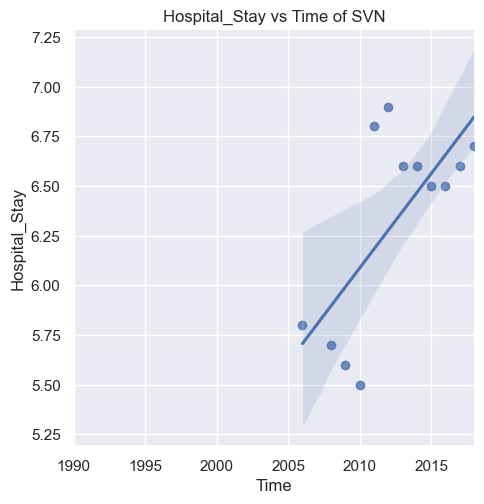

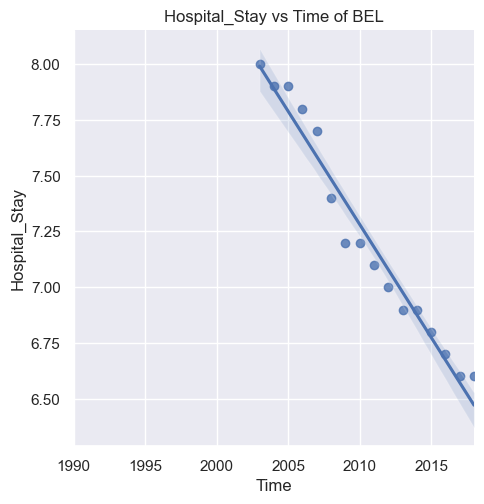

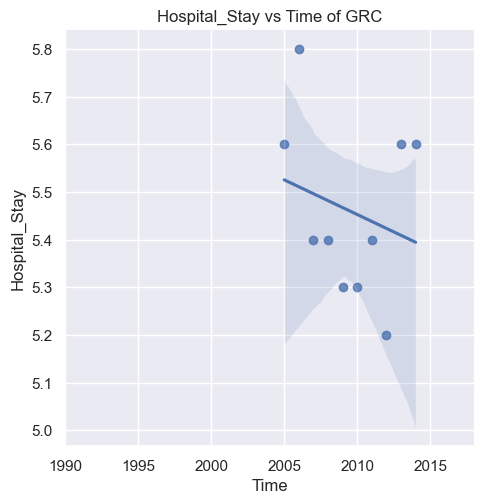

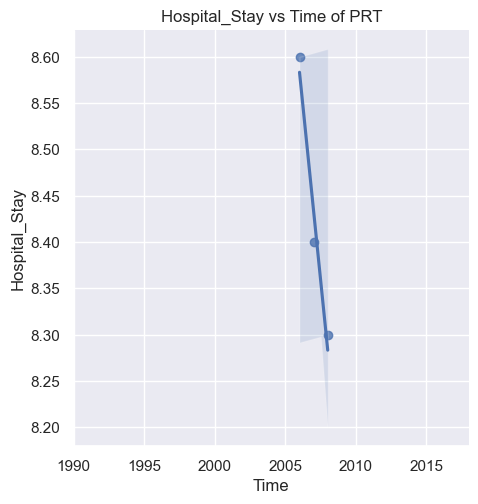

In [41]:
for loc in locations:
    df_tmp = df[df['Location']==loc]
    sns.lmplot(x='Time', y='Hospital_Stay', data=df_tmp).set(xlim=(1990, 2018))
    ax = plt.gca()
    ax.set_title(f'Hospital_Stay vs Time of {loc}')

In [43]:
import math

In [44]:
df_log = df.copy()
df_log['Hospital_Stay'] = df_log['Hospital_Stay'].map(lambda x: math.log(x))

In [46]:
df_log

Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0        AUS  1992       1.887070       1.43        16.71           1.43
1        AUS  1994       1.856298       2.36        18.48           2.36
2        AUS  1995       1.871802       2.89        20.55           2.89
3        AUS  1996       1.856298       2.96        21.95           2.96
4        AUS  1997       1.824549       3.53        23.34           3.53
..       ...   ...            ...        ...          ...            ...
513      LTU  2014       1.916923      10.57        22.17          10.57
514      LTU  2015       1.887070      11.02        21.00          11.02
515      LTU  2016       1.887070      12.20        23.01          12.20
516      LTU  2017       1.871802      12.37        23.33          12.37
517      LTU  2018       1.871802      12.49        24.27          12.49

[518 rows x 6 columns]

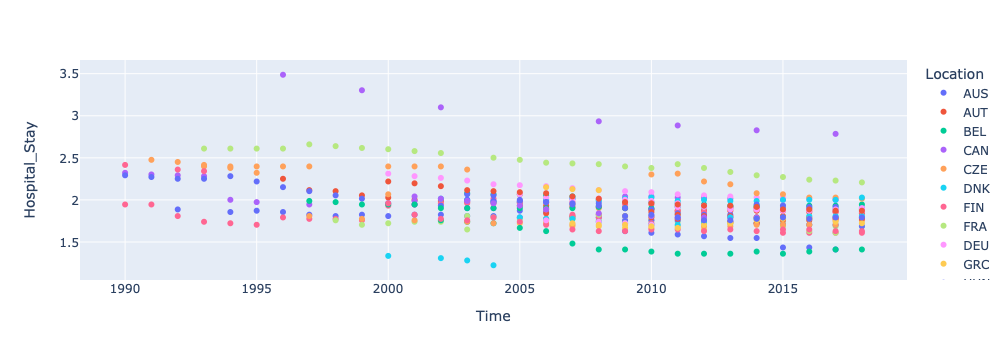

In [47]:
fig = px.scatter(df_log, x='Time', y='Hospital_Stay', color='Location', hover_data= ['Time', 'Location'])
fig.show()

/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



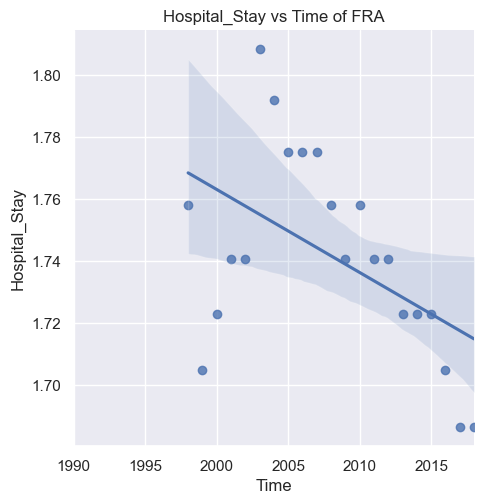

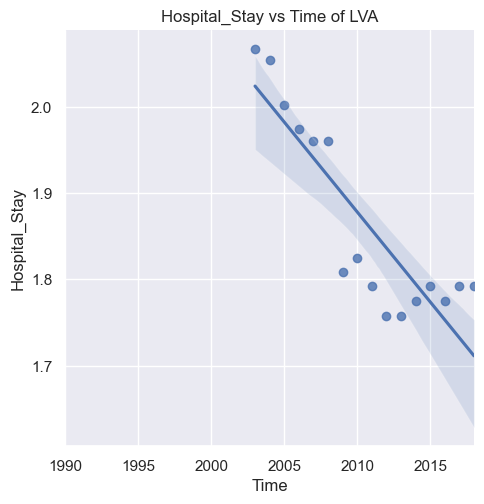

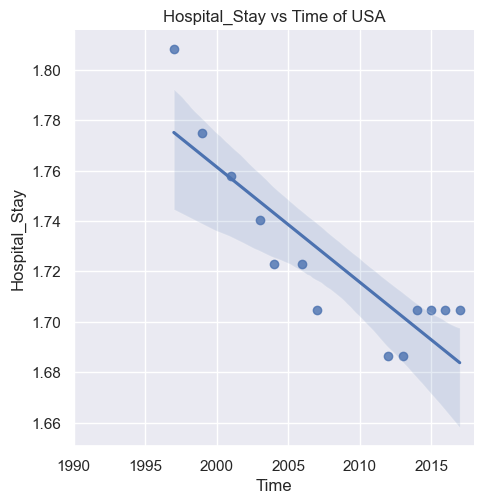

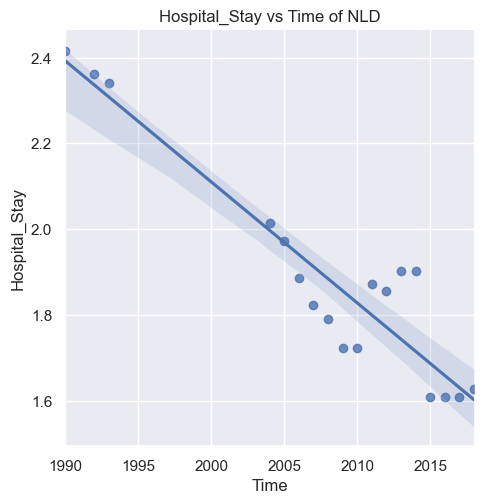

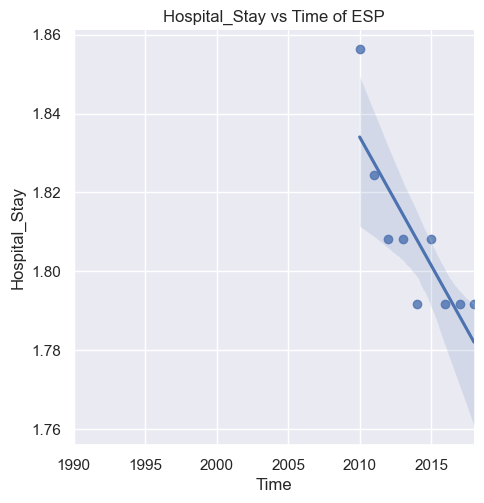

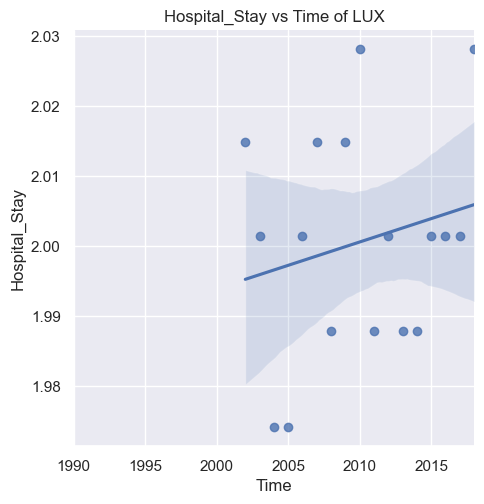

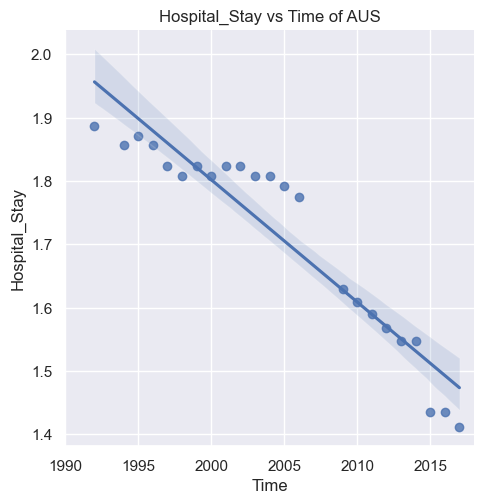

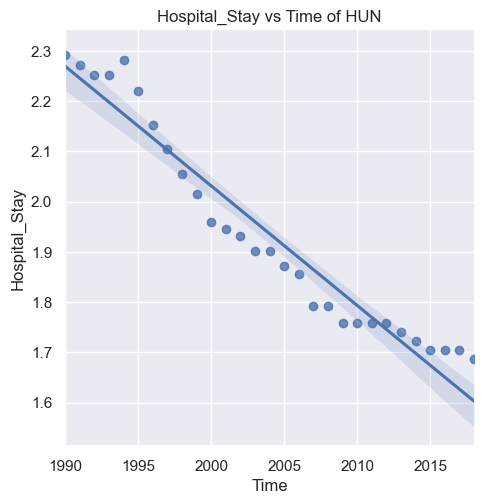

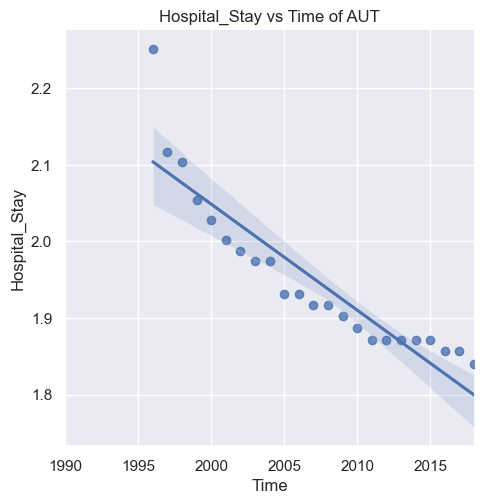

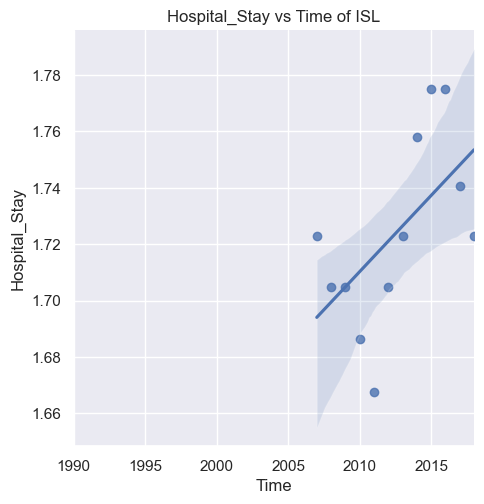

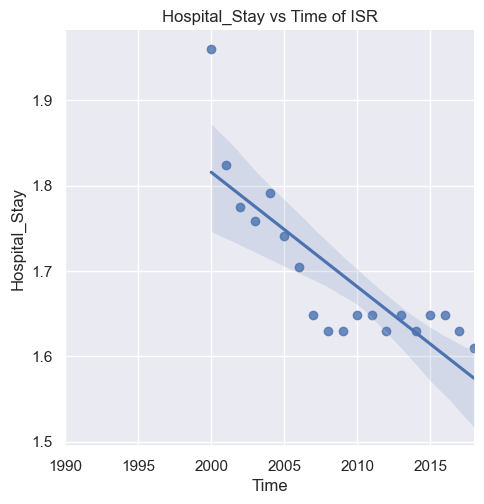

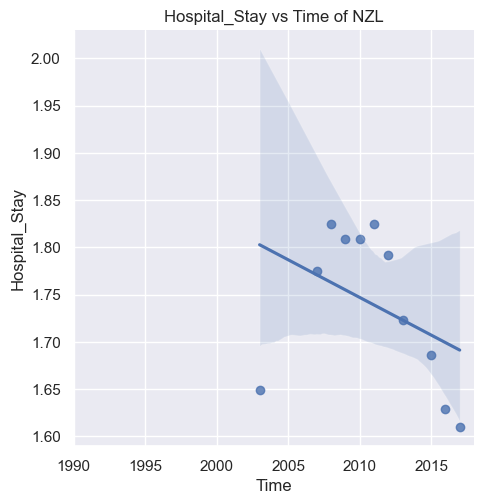

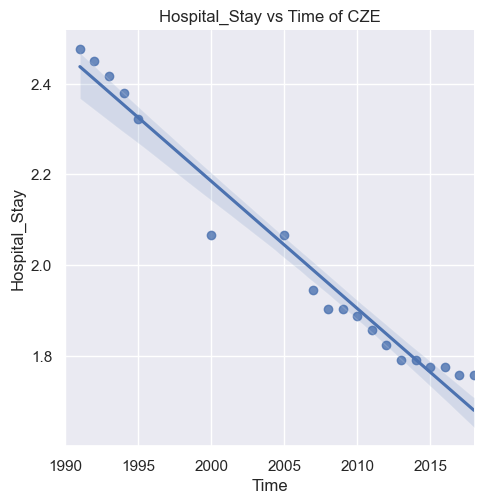

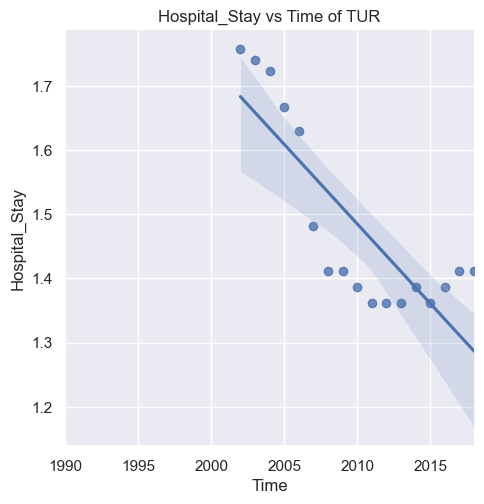

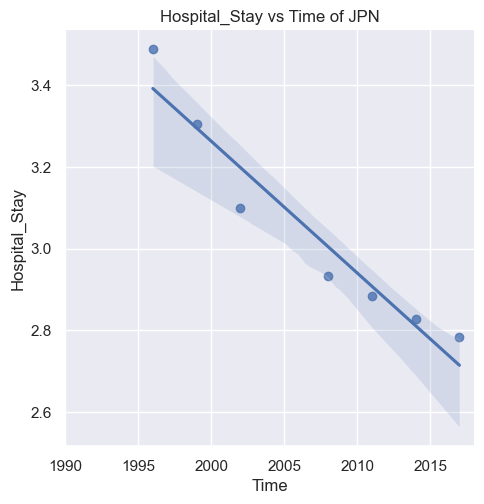

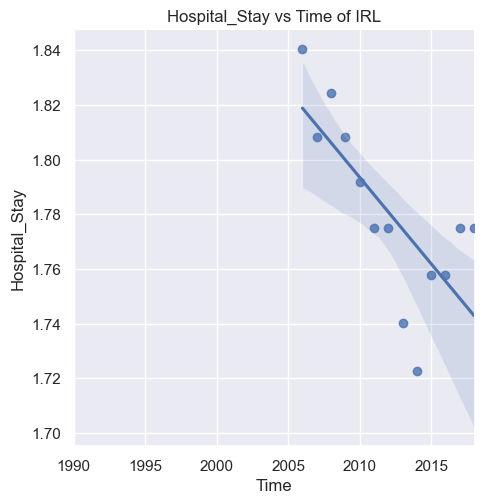

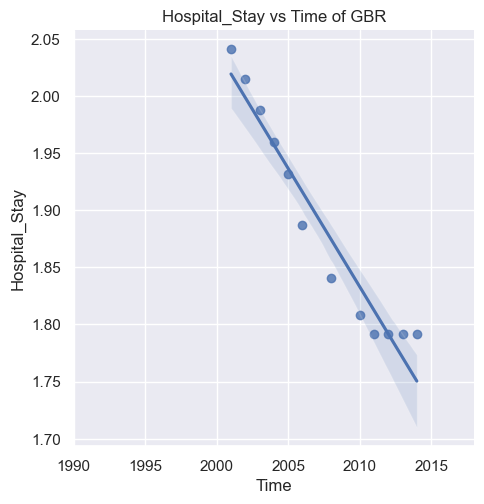

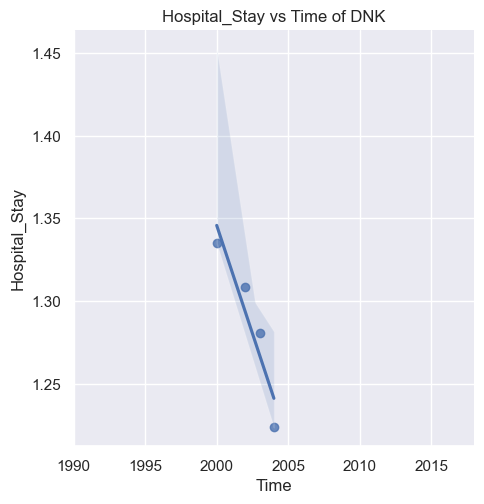

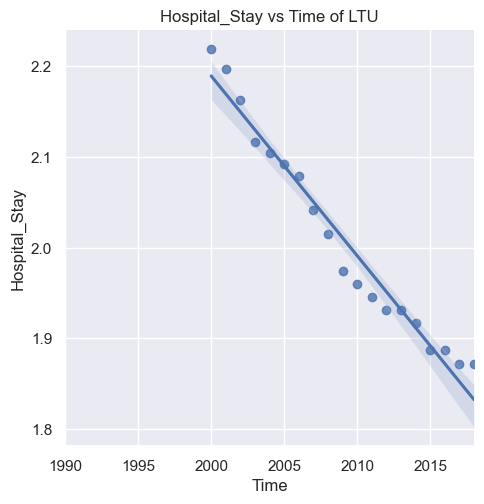

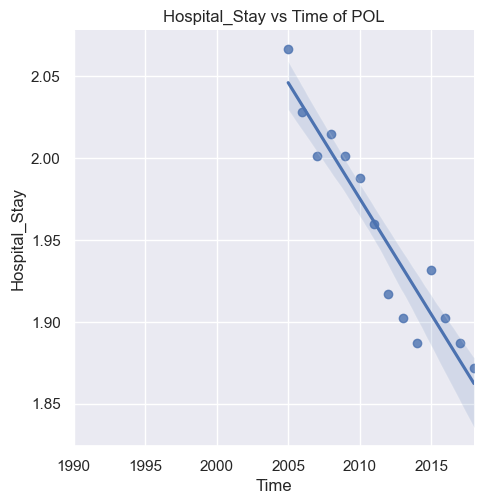

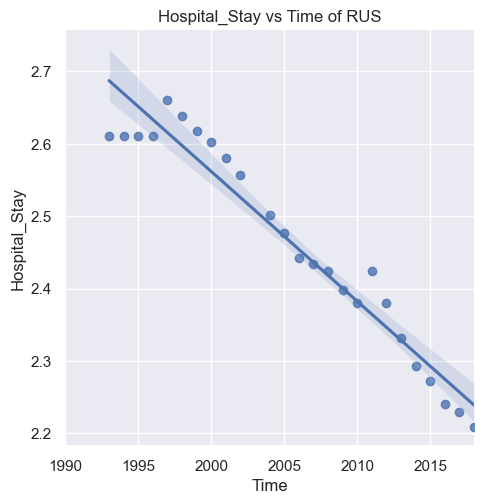

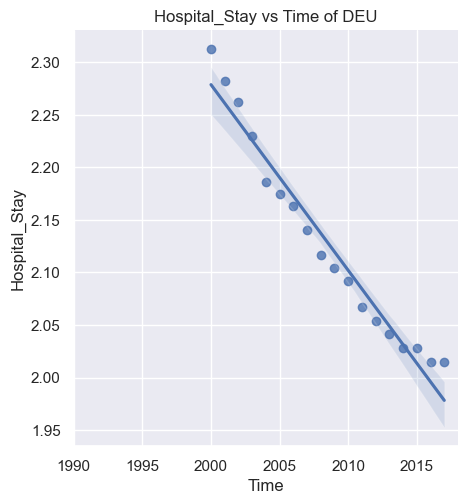

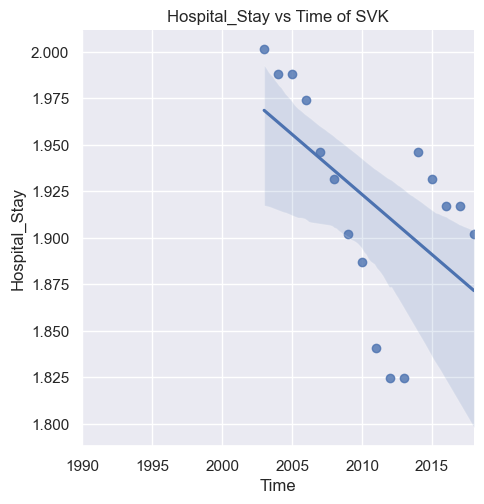

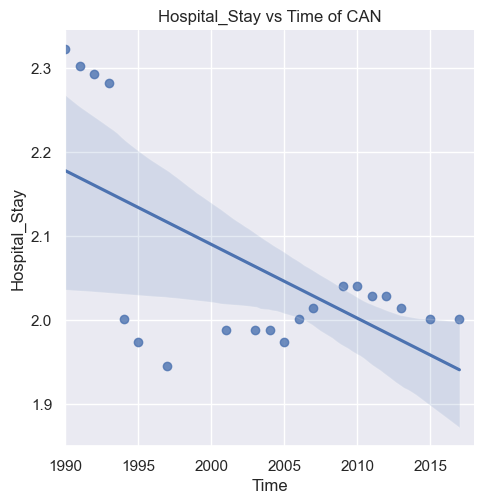

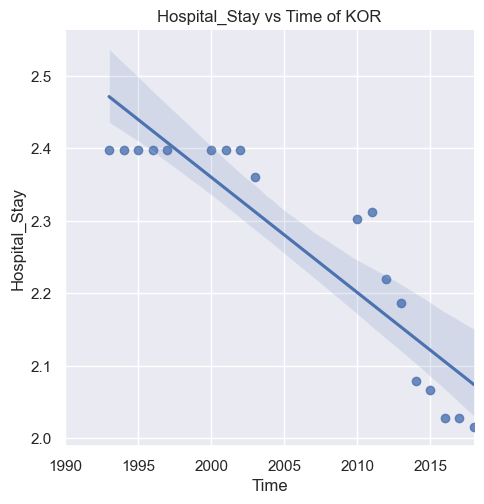

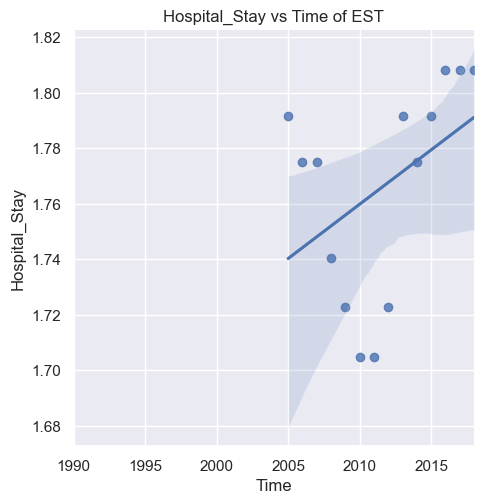

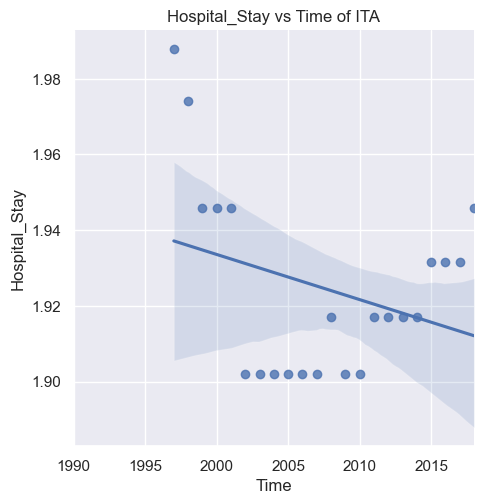

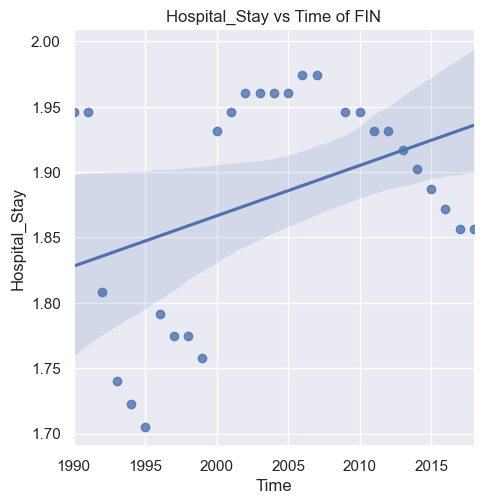

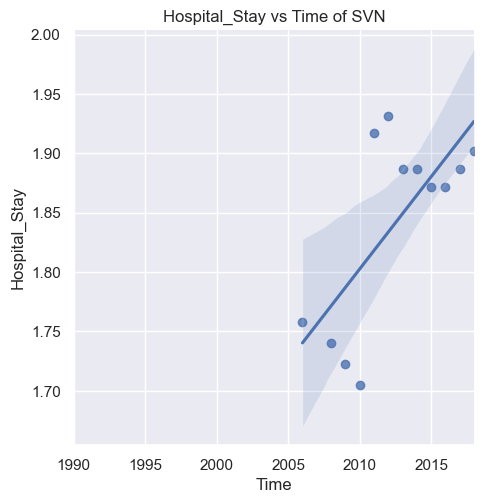

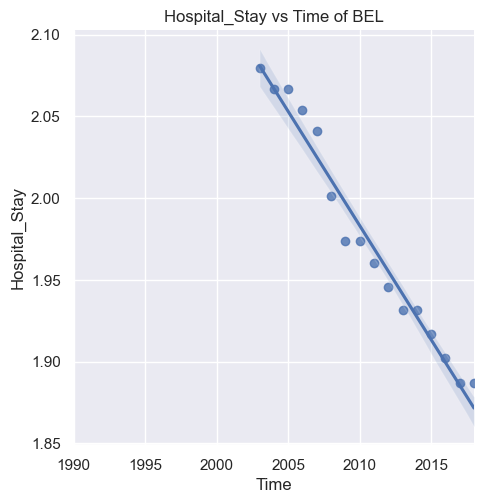

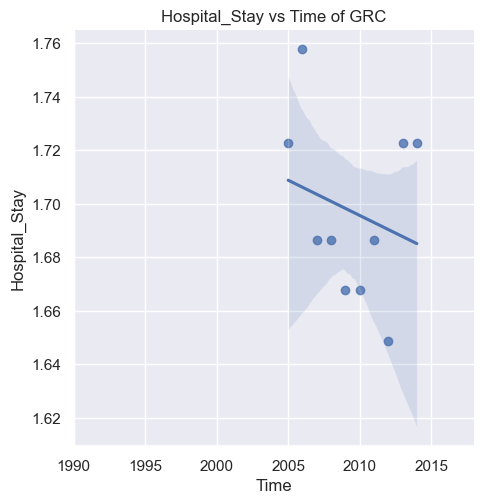

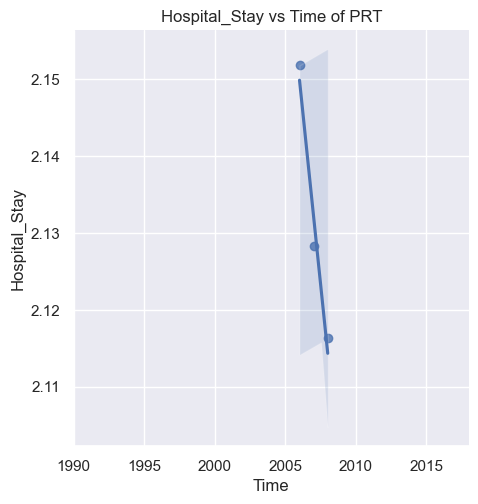

In [49]:
for loc in locations:
    df_tmp = df_log[df_log['Location']==loc]
    sns.lmplot(x='Time', y='Hospital_Stay', data=df_tmp).set(xlim=(1990, 2018))
    ax= plt.gca()
    ax.set_title(f"Hospital_Stay vs Time of {loc}")

In [52]:
Location = pd.Categorical(df_log.Location)
df_log = df_log.set_index(['Location', 'Time'])

In [53]:
df_log

Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
Location Time                                                      
AUS      1992       1.887070       1.43        16.71           1.43
         1994       1.856298       2.36        18.48           2.36
         1995       1.871802       2.89        20.55           2.89
         1996       1.856298       2.96        21.95           2.96
         1997       1.824549       3.53        23.34           3.53
...                      ...        ...          ...            ...
LTU      2014       1.916923      10.57        22.17          10.57
         2015       1.887070      11.02        21.00          11.02
         2016       1.887070      12.20        23.01          12.20
         2017       1.871802      12.37        23.33          12.37
         2018       1.871802      12.49        24.27          12.49

[518 rows x 4 columns]

In [56]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.1 MB/s eta 0:00:00
  Using cached Cython-0.29.35-py2.py3-none-any.whl (988 kB)
  Using cached setuptools_scm-7.1.0-py3-none-any.whl (43 kB)
  Created wheel for linearmodels: filename=linearmodels-5.0-cp39-cp39-macosx_10_9_x86_64.whl size=1793489 sha256=5924d941a2c5a5028d2d4ef3e4f20eaf4c02684a2df6e27b9c4e673267fcf201
  Stored in directory: /Users/anastasiiashaparets/Library/Caches/pip/wheels/ee/f9/41/32079a7e1d4045d42a29a4505fc05e0af12c1752ea8181e338
Successfully built linearmodels
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32


In [57]:
from linearmodels.panel import PanelOLS, RandomEffects

In [58]:
formula_fe = 'Hospital_Stay ~ CT_Scanners + Hospital_Beds + EntityEffects'
mod_fe = PanelOLS.from_formula(formula_fe, data=df_log)
result_fe= mod_fe.fit()

In [59]:
print(result_fe.summary.tables[1])

                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
CT_Scanners      -0.0097     0.0013    -7.6954     0.0000     -0.0122     -0.0072
Hospital_Beds    -0.0050     0.0014    -3.5711     0.0004     -0.0078     -0.0023


In [60]:
durbin_watson(result_fe.resids)

0.3763175672129866

In [62]:
import statsmodels.api as sm

In [64]:
exog_vars = ['CT_Scanners', 'Hospital_Beds']
exog = sm.add_constant(df_log[exog_vars])
mod_ra = RandomEffects(df_log.Hospital_Stay, exog)
results_ra = mod_ra.fit()

In [66]:
print(results_ra)

                        RandomEffects Estimation Summary                        
Dep. Variable:          Hospital_Stay   R-squared:                        0.3380
Estimator:              RandomEffects   R-squared (Between):             -0.8574
No. Observations:                 518   R-squared (Within):               0.3459
Date:                Wed, Jun 07 2023   R-squared (Overall):             -0.3973
Time:                        13:26:24   Log-likelihood                    422.66
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      131.50
Entities:                          32   P-value                           0.0000
Avg Obs:                       16.188   Distribution:                   F(2,515)
Min Obs:                       3.0000                                           
Max Obs:                       29.000   F-statistic (robust):             100.63
                            